#Example of univariate forecasting with Auto-TSF

In [1]:
!pip install --quiet git+https://github.com/PatriciaLucas/AutoML.git

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.6/309.6 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 14.4 MB/s eta 0:00:00


In [2]:
import pandas as pd
from AUTOTSF import autotsf, datasets, save_database as sd, measures
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

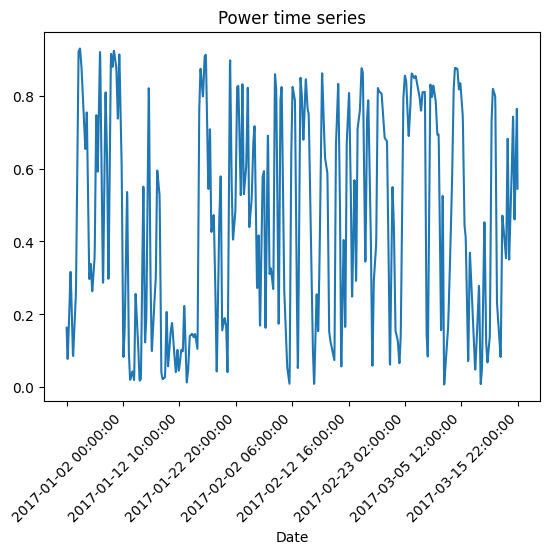

In [3]:
name_dataset = 'ENERGY_1'
target = 'Power'
data = pd.DataFrame(datasets.get_univariate(name_dataset, target))
data = data.head(2000)
data[target].plot(rot=45, title="Power time series")
pass

In [4]:
train, test = data.head(int(data.shape[0]-30)), data.tail(30)

In [5]:
model = autotsf.AUTOTSF(params_MEOHP = {'npop': 20,'ngen': 10,'size_train': 200,'size_test': 50},
                 feature_selection = True,
                 distributive_version = True,
                 save_model = True,
                 path_model = 'model',
                 decomposition = True,
                 max_lags = 20,
                 test_size = 0,
                 optimize_hiperparams = True)
model.fit(train, target)

Start time: 2025-01-14 16:46:32.649564

FEATURE EXTRACTION LAYER - DECOMPOSITION
Lag window size: 20
FEATURE SELECTION LAYER - CAUSAL
THE CAUSAL GRAPH CONTAINS THE FOLLOWING VARIABLES: ['IMF1', 'IMF2', 'IMF3', 'IMF4', 'IMF5', 'IMF6']
MODEL SELECTION LAYER
HPO started...


Processing: 100%|██████████| 10/10 [02:14<00:00, 13.46s/it]


MODEL TRAINING
Run time: 0:03:32.265401


In [6]:
forecast = model.predict_ahead(step_ahead=30)
real = test[target].values.tolist()

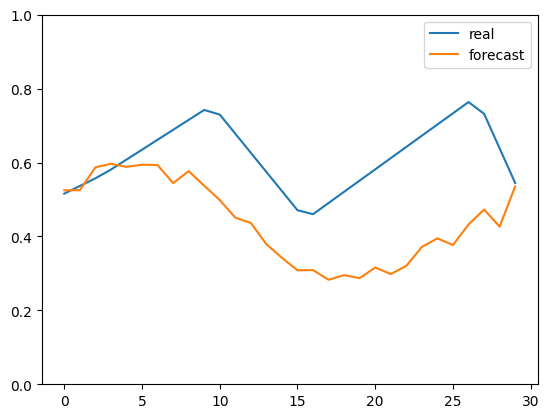

In [7]:
import matplotlib.pyplot as plt
real_old_1 = pd.concat([train[target].head(500), test[target]], ignore_index=True).values
plt.plot(test[target].values, label='real')
plt.plot(forecast.values, label='forecast')
plt.ylim([0, 1])
plt.legend()
plt.show()

##Accessing the causal graph of variables

In [9]:
model.G_list['IMF1']

,IMF1,IMF2,IMF3,IMF4,IMF5,IMF6
1,True,False,False,False,False,False
2,True,False,False,False,False,False
3,True,False,False,False,False,False
4,True,False,False,False,False,False
5,True,False,False,False,False,False
6,True,False,False,False,False,False
7,True,False,False,False,False,False
8,True,False,False,False,False,False
9,False,False,False,False,False,False
10,True,False,False,False,False,False


##Accessing models and variable hyperparameters

In [ ]:
model.dict_variables['IMF1']['hiperparam']

{'model': 'XGBoost',
 'n_estimators': 326,
 'min_samples_leaf': 17,
 'max_features': 0.4,
 'factorial_cost': {'temperature_2m': 0.13567513375694595,
  'relativehumidity_2m': 0.1470107194813603,
  'dewpoint_2m': 0.09354932744674677,
  'windspeed_10m': 0.22554055971468223,
  'windspeed_100m': 0.18806564178887836,
  'winddirection_10m': 0.32207133175849945,
  'winddirection_100m': 0.2978074745100406,
  'windgusts_10m': 0.6753597374120366,
  'IMF1': 0.10008289144633005,
  'IMF2': 0.1268461264853558,
  'IMF3': 0.24146870107543428,
  'IMF4': 1.6345282948894466,
  'IMF5': 23.82008857550771,
  'IMF6': 0.44839242907201576},
 'factorial_rank': {'temperature_2m': 1.0,
  'relativehumidity_2m': 19.0,
  'dewpoint_2m': 6.0,
  'windspeed_10m': 6.0,
  'windspeed_100m': 13.0,
  'winddirection_10m': 15.0,
  'winddirection_100m': 23.0,
  'windgusts_10m': 8.0,
  'IMF1': 4.0,
  'IMF2': 14.0,
  'IMF3': 15.0,
  'IMF4': 19.0,
  'IMF5': 11.0,
  'IMF6': 5.0},
 'factorial_skill': 'relativehumidity_2m',
 'scalar_f